In [300]:

import RELUNTK
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
import pandas as pd 
import torch.optim
import torch
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


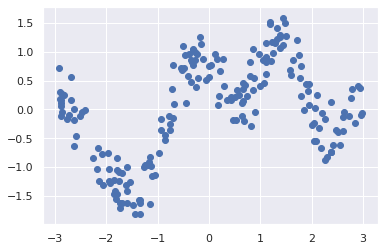

In [677]:
train_data = pd.read_csv("Simple_train.csv" )
train_data = train_data - train_data.mean(axis = 0)
Xtrain = torch.tensor(train_data["X"].values.reshape(-1,1)   ,dtype = torch.float)
Ytrain = torch.tensor(train_data["Y"].values.reshape(-1,1) , dtype = torch.float)


plt.scatter(Xtrain, Ytrain )

In [594]:
#Ytrain = 5*Xtrain * (Xtrain>0) + 0.2 * torch.randn(Ytrain.shape) - 2 * 5*Xtrain * (Xtrain < 0)

Xtrainwithbias = torch.zeros(( len(Xtrain) , 2))
Xtrainwithbias[:,0] = Xtrain.flatten()
Xtrainwithbias[:,1] = 1

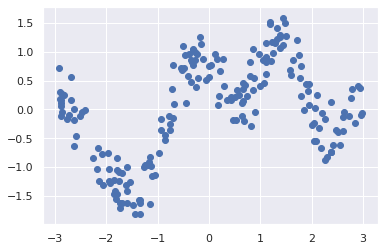

In [678]:
plt.scatter(Xtrain, Ytrain )

In [679]:
seed = 1
nhidden = 5000
model = RELUNTK.NTKtest(1,nhidden,1)
lr = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr = lr )
epochs = 30000
torch.manual_seed(seed)
#scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=50 , gamma=0.05 , last_epoch=-1)
for i in range(epochs):
    loss = RELUNTK.train(model , Xtrain , optimizer , Ytrain , nhidden)
    #scheduler.step()
    if i % 50==0 or i == epochs-1:
        print("Epoch %5d/%5d , loss = %5.4f" % (i+1 , epochs , loss.item()))
    



Epoch     1/30000 , loss = 3.9878
Epoch    51/30000 , loss = 0.5802
Epoch   101/30000 , loss = 0.5802
Epoch   151/30000 , loss = 0.5802
Epoch   201/30000 , loss = 0.5802
Epoch   251/30000 , loss = 0.5802
Epoch   301/30000 , loss = 0.5802
Epoch   351/30000 , loss = 0.5802
Epoch   401/30000 , loss = 0.5802
Epoch   451/30000 , loss = 0.5802
Epoch   501/30000 , loss = 0.5802


KeyboardInterrupt: 

In [680]:
model.Empiricaldynamique(torch.tensor([1.] , requires_grad = True ) , torch.tensor([0.1 ] , requires_grad = True ) , nhidden)

tensor([0.2014])

In [681]:
RELUNTK.kernel_test(np.array([0.1 ]),np.array([1]))

0.2

In [682]:
x = np.linspace(-3,3 , 100)
empdynamik = []
theoricdynamik = []
for a in x:
    empdynamik.append(model.Empiricaldynamique(torch.tensor([0.1  ] , requires_grad = True ) , torch.tensor([a ] , requires_grad = True ) , nhidden))
    theoricdynamik.append(RELUNTK.kernel_test(np.array([0.1]) , np.array([a])))

0.017610595187258746

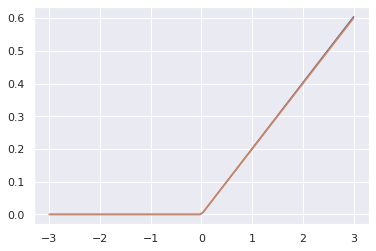

In [683]:
plt.plot( x, np.array(empdynamik))
plt.plot(x , theoricdynamik)
np.linalg.norm(np.array(empdynamik) - theoricdynamik)

In [ ]:
np.abs()

In [685]:
Xfitted = model.forward(Xtrain, nhidden)

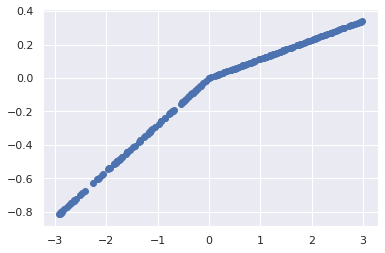

In [686]:
plt.scatter(Xtrain , Xfitted.detach().numpy())